<h1> IBM Data Science Professional Certificate Capstone Project </h1>

This is a capstone project for "IBM Data Science Professional Certificate" as a part of course "Applied Data Science Capstone". The capstone project is meant to define and solve a business problem leveraging Foursquare data, among other publicly available geo-data.

Business Problem
----
Our customer would like to open an ice cream shop in New York City and needs us -the data consultant- to provide metrics and suggestions on where the best neighborhood is for such a shop. 

We define four metrics and break the project into four correspondent segments as follows:

<b>1- Segment One:</b> Rank boroughs in terms of total and youth population

<b>2- Segment Two:</b> Rank boroughs in terms of safety using shooting data as the base

<b>3- Segment Three:</b> Rank neighborhoods in terms of access by distance from a benchmark 

<b>4- Segment Four:</b> Rank neighborhoods in terms of existing ice cream shops parsing Foursquare data

Segments one and two are used to determine the best borough. Segments three and four will refine the neighborhood data to find the best neighborhood.


Data Requirement
---
Data that is used for segment one is <a href="https://catalog.data.gov/dataset/demographic-social-economic-and-housing-profiles-by-borough">Demographic and Housing Profiles by Borough</a>. The data is sorted as an excel file which needs to be refined and prepared. 

Data that is used for segment two is <a href="https://catalog.data.gov/dataset/nypd-shooting-incident-data-historic">NYPD Shooting Incident Data</a>. The data is sorted as different formats including csv. 

Data for segment three is <a href="https://cocl.us/new_york_dataset">New York Geo Data</a> as a json file. 

Segment four data is acquired through Foursquare as a json file that includes information about venues near specific locations. Tis section requires a Foursquare account and a customized URL which is provided in the relevant section. 

<h1> Segment One </h1>

<h2> Import Libraries </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install xlrd

<h2> Import and Clean Data </h2>

In [3]:
df = pd.read_excel('https://www1.nyc.gov/assets/planning/download/office/data-maps/nyc-population/acs/demo_2016acs5yr_nyc.xlsx',
                       sheet_name='DP05',
                       skiprows=range(2),
                       skipfooter=18
                      )

df.drop([df.columns[1]], axis=1, inplace=True)  #remove NaN column

#find boroughs
boroughs = df.iloc[0]  
boroughs = boroughs.dropna()
boroughs.drop(boroughs.index[[0, -1]], inplace=True)
boroughs#.to_frame()
#for i in boroughs:
 #   print(i)

#combine subject rows and replace headers
dftemp = df.loc[0].combine_first(df.loc[1])  
df.loc[0] = dftemp
df.drop(1, inplace=True)
df.columns = df.iloc[0]
df.drop(df.index[[0,1]],  inplace=True)
df.reset_index(drop=True, inplace=True) 
df.set_index('Subject', inplace=True)
df


,Bronx,Margin of Error,Percent,Percent Margin of Error,Brooklyn,Margin of Error,Percent,Percent Margin of Error,Manhattan,Margin of Error,...,Percent,Percent Margin of Error,Staten Island,Margin of Error,Percent,Percent Margin of Error,New York city,Margin of Error,Percent,Percent Margin of Error
Subject,,,,,,,,,,,,,,,,,,,,,
Total population,"1,436,785",*****,"1,436,785",(X),"2,606,852",*****,"2,606,852",(X),"1,634,989",*****,...,"2,310,011",(X),"473,324",*****,"473,324",(X),"8,461,961",*****,"8,461,961",(X)
Male,"676,440",+/-215,47.1%,+/-0.1,"1,234,959",+/-139,47.4%,+/-0.1,"773,232",+/-93,...,48.5%,+/-0.1,"229,095",+/-82,48.4%,+/-0.1,"4,033,736",+/-378,47.7%,+/-0.1
Female,"760,345",+/-215,52.9%,+/-0.1,"1,371,893",+/-139,52.6%,+/-0.1,"861,757",+/-93,...,51.5%,+/-0.1,"244,229",+/-82,51.6%,+/-0.1,"4,428,225",+/-378,52.3%,+/-0.1
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Under 5 years,"107,454",+/-53,7.5%,+/-0.1,"193,851",+/-113,7.4%,+/-0.1,"82,024",+/-91,...,6.3%,+/-0.1,"27,420",+/-68,5.8%,+/-0.1,"555,383",+/-358,6.6%,+/-0.1
5 to 9 years,"100,908","+/-1,514",7.0%,+/-0.1,"166,770","+/-1,737",6.4%,+/-0.1,"62,937","+/-1,655",...,5.5%,+/-0.1,"29,083",+/-831,6.1%,+/-0.2,"487,643","+/-3,642",5.8%,+/-0.1
10 to 14 years,"98,242","+/-1,511",6.8%,+/-0.1,"154,230","+/-1,734",5.9%,+/-0.1,"59,514","+/-1,654",...,5.4%,+/-0.1,"30,516",+/-832,6.4%,+/-0.2,"466,493","+/-3,746",5.5%,+/-0.1
15 to 19 years,"103,133",+/-173,7.2%,+/-0.1,"150,044",+/-127,5.8%,+/-0.1,"72,486",+/-720,...,5.4%,+/-0.1,"29,923",+/-30,6.3%,+/-0.1,"479,928",+/-777,5.7%,+/-0.1
20 to 24 years,"121,897",+/-195,8.5%,+/-0.1,"188,262",+/-100,7.2%,+/-0.1,"120,405",+/-706,...,6.8%,+/-0.1,"32,042",+/-57,6.8%,+/-0.1,"620,742",+/-789,7.3%,+/-0.1


---
<h2>Youth Population is defined as ages 5 to 19 therefore we need to sum three relevant rows. </h2>


In [5]:
dfb = df[boroughs]
dfb = dfb.dropna()
#dfb = dfb.replace(',','', inplace=True)

dfkids = pd.DataFrame(columns=boroughs)

i = -1
for j in boroughs:
    i = i+1
    dfkids.at[0,j] = int(dfb.iloc[4,i].replace(',', '')) + int(dfb.iloc[5,i].replace(',','')) + int(dfb.iloc[6,i].replace(',',''))

dfkids

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,302283,471044,194937,376278,89522


---
<h2> Plot total and youth population together.
    

,Youth Population,Total Population
Brooklyn,471044,2606852
Queens,376278,2310011
Bronx,302283,1436785
Manhattan,194937,1634989
Staten Island,89522,473324


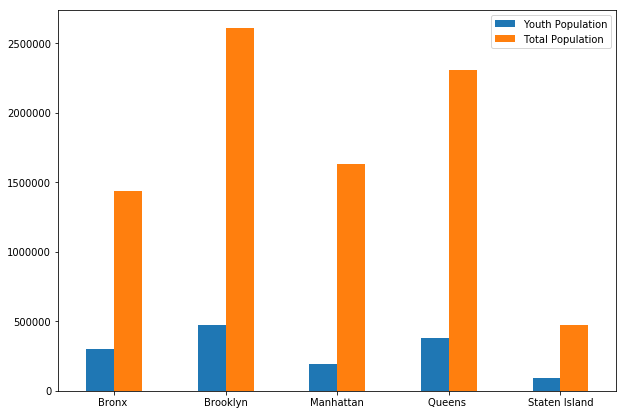

In [4]:
dfplot = pd.DataFrame({'Youth Population': np.arange(0,5),
                       'Total Population': np.arange(0,5)})
for j in range(5):
    dfplot.at[j,'Youth Population'] = dfkids.iloc[0,j]
    dfplot.at[j,'Total Population'] = int(dfb.iloc[0,j].replace(',', ''))
dfplot.index = boroughs
del dfplot.index.name
ax = dfplot.plot.bar(rot=0, figsize=(10,7))

dfplot.sort_values(by='Youth Population', ascending=False)

<h3> It appears that Brooklyn and then Queens have the highest total and youth population both.</h3>

---


    
<h1> Segment Two</h1>

<h2> Import Data</h2>


In [7]:
dfcrime = pd.read_csv('https://data.cityofnewyork.us/api/views/833y-fsy8/rows.csv')
dfc1 = dfcrime.BORO.unique()
dfc2 = dfcrime.groupby('BORO')['INCIDENT_KEY'].nunique()
dfc2

BORO
BRONX            4662
BROOKLYN         7123
MANHATTAN        2040
QUEENS           2532
STATEN ISLAND     505
Name: INCIDENT_KEY, dtype: int64

<h2>Plot Shooting Incidents</h2>

In [11]:
dfplot = pd.DataFrame({'Youth Population': np.arange(0,5),
                       'Total Population': np.arange(0,5)})
for j in range(5):
    dfplot.at[j,'Youth Population'] = dfkids.iloc[0,j]
    dfplot.at[j,'Total Population'] = int(dfb.iloc[0,j].replace(',', ''))
dfplot.index = boroughs

BORO
STATEN ISLAND     505
MANHATTAN        2040
QUEENS           2532
BRONX            4662
BROOKLYN         7123
Name: INCIDENT_KEY, dtype: int64

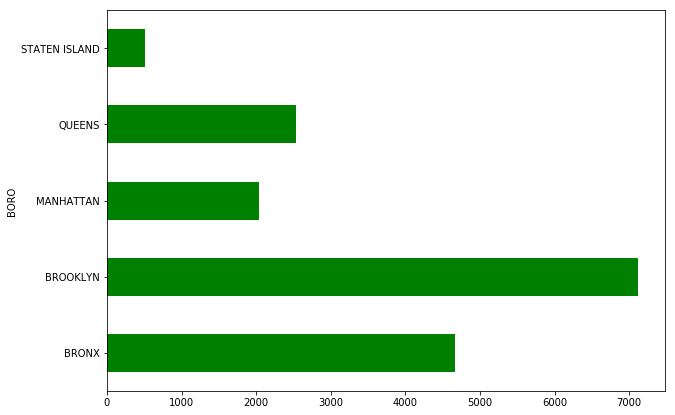

In [12]:
ax = dfc2.plot.barh(rot=0, figsize=(10,7), color='green')

dfc3 = pd.Series(dfc2)
dfc3.sort_values()

<h3> It appears that Queens has significantly less incidents than Brooklyn. Our borough pick is therefore Queens.</h3>

---

<h1> Segment Three </h1>

<h2> Download Libraries </h2>

In [39]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library

from ipykernel import kernelapp as app

print('Libraries imported.')

Libraries imported.


<h2> Download Data </h2>


In [14]:
# download and extract data
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
neighborhoods_data = newyork_data['features']

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)



Data downloaded!


<h2> Queens Neighborhoods Data </h2>

In [15]:
queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
queens_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


<h2> Queens Neighborhoods Map </h2>

In [16]:
# get latitude and longitude of Queens
address = 'Queens, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude, longitude))

# create map of Queens using latitude and longitude values
map_queens = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(queens_data['Latitude'], queens_data['Longitude'], queens_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_queens)  
    
map_queens

The geograpical coordinate of Queens are 40.7498243, -73.7976337.


<h3> Map Screenshot </h3>
<img src="https://raw.githubusercontent.com/osrow/IBM-Capstone/master/Queens_Map.png" align="left">

<h2> Manhattan Latitude/Longitude </h2>

<h3> Since Manhattan is not the selected borough, it is selected as the benchmark for this segment as being closest to Manhattan brings a higher chance of tourist and business foot traffic in addition to resident population.<h3>

In [17]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


<h2> 5 Closest Queens Neighborhoods to Manhattan </h2>

In [18]:
# number of Queens neighborhood
print('Queens has {} neighborhoods.'.format(queens_data.shape[0]))


Queens has 81 neighborhoods.


In [19]:
for i in range(81):
    queens_data.at[i,'DistanceToMan(km)'] = np.sqrt(np.square((queens_data.loc[i,'Latitude']-latitude)*111)+np.square((queens_data.loc[i,'Longitude']-longitude)*111*np.cos(latitude)))

In [20]:
qdsorted = queens_data.sort_values(by='DistanceToMan(km)')
qdsorted.reset_index(drop=True, inplace=True)
qdsorted.index.name = 'Rank'
qdsorted.head()

,Borough,Neighborhood,Latitude,Longitude,DistanceToMan(km)
Rank,,,,,
0,Queens,Queensbridge,40.756091,-73.945631,4.044033
1,Queens,Ravenswood,40.761705,-73.931575,4.411265
2,Queens,Long Island City,40.750217,-73.939202,4.939070
3,Queens,Hunters Point,40.743414,-73.953868,5.172607
4,Queens,Astoria,40.768509,-73.915654,5.435539


In [21]:
# pass top 5 neighborhoods as array
top5ar = qdsorted[0:5]['Neighborhood'].astype(str)

#pass top 5 as df
top5df = pd.DataFrame(columns=['Neighborhood', 'Latitude', 'Longitude'])
for i in range(5):
    top5df.at[i,'Neighborhood'] = qdsorted.loc[i]['Neighborhood']
    top5df.at[i,'Latitude'] = qdsorted.loc[i]['Latitude']
    top5df.at[i,'Longitude'] = qdsorted.loc[i]['Longitude']


<h1> Segment Four </h1>
<h2> Foursquare API</h2>

In [22]:
CLIENT_ID = 'X3ITNPE3G1ZYYVMCXKNZNX1ILW5SJRI0FUR3SV2M0A1TWRW3' # your Foursquare ID
CLIENT_SECRET = 'LFPUDM4AT4BELBVRLS5RYREYM342GTOV0KP1SZDDQFR1W42H' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: X3ITNPE3G1ZYYVMCXKNZNX1ILW5SJRI0FUR3SV2M0A1TWRW3
CLIENT_SECRET:LFPUDM4AT4BELBVRLS5RYREYM342GTOV0KP1SZDDQFR1W42H


In [82]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=X3ITNPE3G1ZYYVMCXKNZNX1ILW5SJRI0FUR3SV2M0A1TWRW3&client_secret=LFPUDM4AT4BELBVRLS5RYREYM342GTOV0KP1SZDDQFR1W42H&v=20180605&ll=40.7896239,-73.9598939&radius=500&limit=100'

In [83]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e85357f949393001b3489c0'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Central Park',
  'headerFullLocation': 'Central Park, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 31,
  'suggestedBounds': {'ne': {'lat': 40.794123904500005,
    'lng': -73.95396136384342},
   'sw': {'lat': 40.7851238955, 'lng': -73.96582643615658}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4a78425df964a52053e51fe3',
       'name': 'Central Park Tennis Center',
       'location': {'address': 'Central Park West at 96th St',
        'lat': 40.78931319964619,
        'lng': -73.96186241658044,
        'labeledLatLngs': [{'label': 'disp

<h2> Get Nearby Venues for the Top 5 Neighborhoods </h2>

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood_Latitude', 
                  'Neighborhood_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

In [27]:
queens_venues = getNearbyVenues(names=top5df['Neighborhood'],
                                latitudes=top5df['Latitude'],
                                   longitudes=top5df['Longitude']
                                  )


Queensbridge
Ravenswood
Long Island City
Hunters Point
Astoria


In [30]:
queens_venues.head()

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Queensbridge,40.756091,-73.945631,Queensboro Bridge Pedestrian & Bike Path,40.755201,-73.950445,Scenic Lookout
1,Queensbridge,40.756091,-73.945631,Ravel Hotel,40.753989,-73.949244,Hotel
2,Queensbridge,40.756091,-73.945631,Queensbridge Park,40.756701,-73.948653,Park
3,Queensbridge,40.756091,-73.945631,Boulevard Restaurant,40.755648,-73.941834,Spanish Restaurant
4,Queensbridge,40.756091,-73.945631,SUBWAY,40.755557,-73.941276,Sandwich Place


<h2> Check Existing Ice Cream Shops in the Top 5 Neighborhood </h2>

In [78]:
queens_venues['Venue_Category']  

0                 Scenic Lookout
1                          Hotel
2                           Park
3             Spanish Restaurant
4                 Sandwich Place
5                      Roof Deck
6                          Hotel
7                          Hotel
8                      Hotel Bar
9          Performing Arts Venue
10          Gym / Fitness Center
11                    Hotel Pool
12                   Beer Garden
13                      Platform
14                    Taco Place
15            Italian Restaurant
16           Japanese Restaurant
17              Ramen Restaurant
18                 Grocery Store
19             Food & Drink Shop
20             Afghan Restaurant
21          Brazilian Restaurant
22                           Bar
23              Greek Restaurant
24                         Diner
25                    Bagel Shop
26            Chinese Restaurant
27                  Liquor Store
28            Chinese Restaurant
29                        Market
          

In [80]:
qvics = queens_venues[(queens_venues.Venue_Category == 'Ice Cream Shop')]
qvics

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
50,Long Island City,40.750217,-73.939202,Ice & Vice Pop-Up,40.747730,-73.941025,Ice Cream Shop
195,Astoria,40.768509,-73.915654,Ample Hills Creamery,40.765562,-73.919012,Ice Cream Shop
216,Astoria,40.768509,-73.915654,Cold Stone Creamery,40.765696,-73.913778,Ice Cream Shop


In [81]:
for i in top5df['Neighborhood']:
    print('Neighborhood {} has {} ice cream shop(s).'.format(i, len(qvics[(qvics.Neighborhood == i)])))

Neighborhood Queensbridge has 0 ice cream shop(s).
Neighborhood Ravenswood has 0 ice cream shop(s).
Neighborhood Long Island City has 1 ice cream shop(s).
Neighborhood Hunters Point has 0 ice cream shop(s).
Neighborhood Astoria has 2 ice cream shop(s).


<h2> It appears that our top neighborhood does not have any competition and is closest to Manhattan. </h2>
   
 <h2> Therefore, our suggested neighborhood would be "Queensbridge".</h2>